In [46]:
import pandas as pd
import os
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import numpy as np

# Import supplementary visualization code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline


In [ ]:
path_to_data= "/home/ubuntu/udacity/CodeGladiator/abc-data-services/data"

train_file = "train_data.csv"
test_file = "test_data.csv"

In [ ]:
train_df = pd.read_csv(os.path.join(path_to_data, train_file))
test_df = pd.read_csv(os.path.join(path_to_data,test_file))

In [ ]:
train_df.describe()

In [ ]:
#train_df['ApplicantIncome'].hist(bins=50)

fig, ax = plt.subplots(1,2)
ax[0].hist(train_df['ApplicantIncome'], bins=50, alpha = 0.5, color = 'r')
ax[0].set_ylabel('ApplicantIncome')
ax[1].hist(train_df['CoapplicantIncome'], bins=50, alpha = 0.5, color = 'g')
ax[1].set_ylabel('CoapplicantIncome')
plt.show()

In [ ]:
fig, ax2 = plt.subplots(1,2)
ax2[0].hist(train_df['LoanAmount'], bins=50, alpha = 0.5, color = 'r')
ax2[0].set_ylabel('LoanAmount')
ax2[1].hist(train_df['Loan_Amount_Term'], bins=50, alpha = 0.5, color = 'g')
ax2[1].set_ylabel('Loan_Amount_Term')
plt.show()

In [ ]:
train_df['CoapplicantIncome'].hist(bins=50)

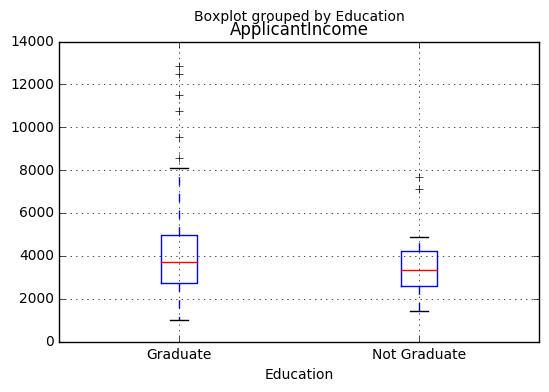

In [25]:
train_df.boxplot(column='ApplicantIncome', by = 'Education')

Creating pivot tables

In [26]:
temp1 = train_df['Credit_History'].value_counts(ascending=True)
temp2 = train_df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:') 
print(temp1)

print('\nProbility of getting loan for each Credit History class:' )
print(temp2)

Frequency Table for Credit History:
0.0    15
1.0    77
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Credit_History
0.0    0.000000
1.0    0.779221
Name: Loan_Status, dtype: float64


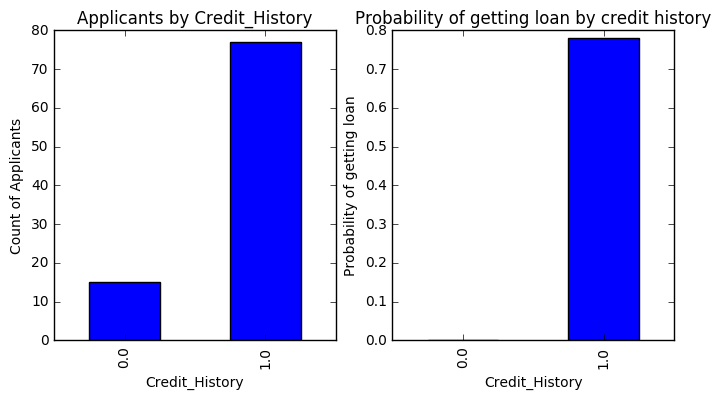

In [27]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

In [32]:
temp1 = train_df['Credit_History'].value_counts(ascending=True)
temp2 = train_df.pivot_table(values='Loan_Status',index=['Credit_History','Gender','Education'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:') 
print(temp1)

print('\nProbility of getting loan for each Credit History class:' )
print(temp2)

Frequency Table for Credit History:
0.0    15
1.0    77
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Credit_History  Gender  Education   
0.0             F       Graduate        0.000000
                M       Graduate        0.000000
                        Not Graduate    0.000000
1.0             F       Graduate        0.777778
                        Not Graduate    1.000000
                M       Graduate        0.759259
                        Not Graduate    0.846154
Name: Loan_Status, dtype: float64


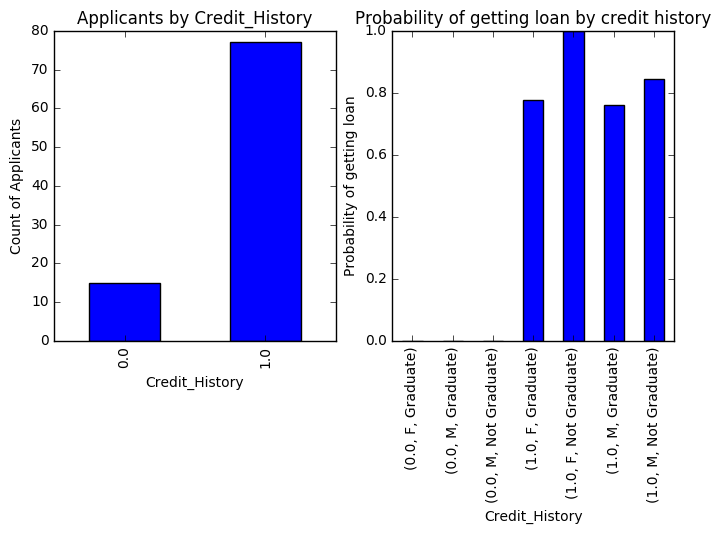

In [34]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar',stacked=True)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

Loan_Status      N   Y
Credit_History        
0.0             15   0
1.0             17  60


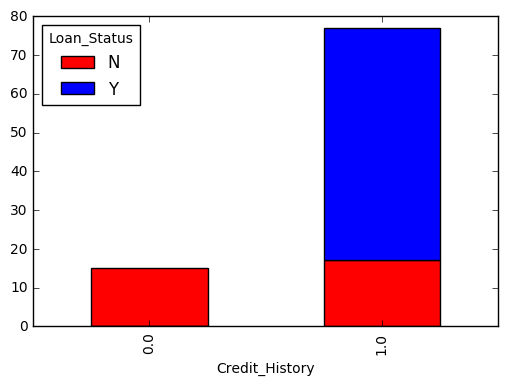

In [35]:
temp3 = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'])
print(str(temp3))
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [54]:
df = train_df

checking null values

In [55]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Application_ID       0
Gender               1
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     5
Credit_History       8
Property_Area        0
Loan_Status          0
dtype: int64

imputing missing values

In [38]:
 df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

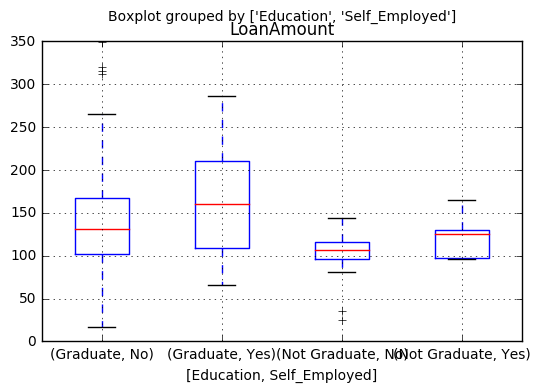

In [40]:
train_df.boxplot(column='LoanAmount', by = ['Education','Self_Employed'])

In [43]:
df['Self_Employed'].value_counts()

No     81
Yes    13
Name: Self_Employed, dtype: int64

Since ~81% values are “No”, it is safe to impute the missing values as “No” as there is a high probability of success. 

In [44]:
df['Self_Employed'].fillna('No',inplace=True)

In [58]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
print(table)

Education        Graduate  Not Graduate
Self_Employed                          
No             131.000000         107.0
Yes            160.610526         125.0


In [48]:
table = df.pivot_table(values='LoanAmount', index=['Self_Employed' ,'Education'], aggfunc=np.median)
print(table)

Self_Employed  Education   
No             Graduate        131.000000
               Not Graduate    107.000000
Yes            Graduate        160.610526
               Not Graduate    125.000000
Name: LoanAmount, dtype: float64


In [59]:
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

In [ ]:
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

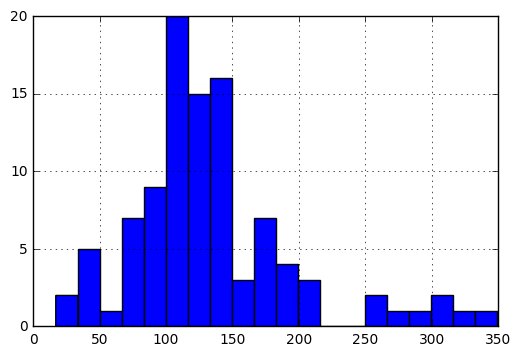

In [61]:
df['LoanAmount'].hist(bins=20)

Dealing with outliers

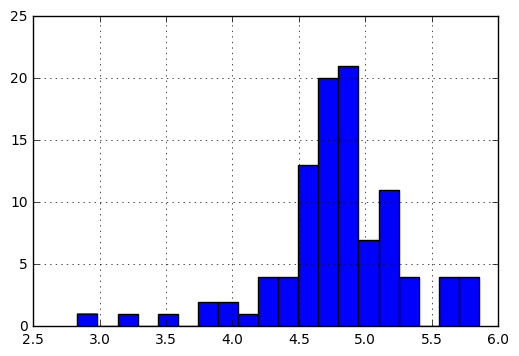

In [62]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

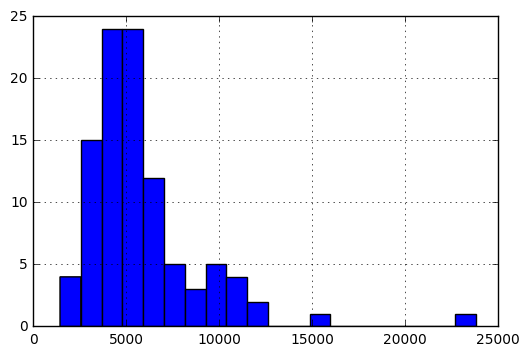

In [63]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome'].hist(bins=20)

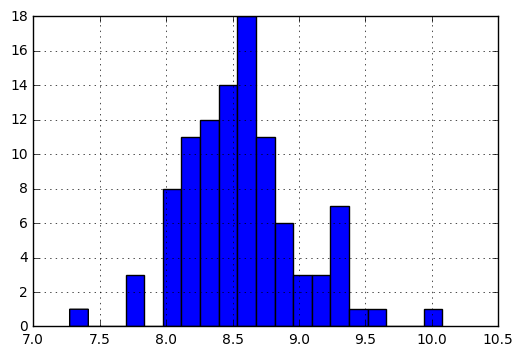

In [64]:
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20) 

impute gender and other classes in same way 

In [66]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    print(i)
    df[i] = le.fit_transform(df[i])
df.dtypes 

Gender


TypeError: unorderable types: float() > str()

In [ ]:
print(train_df[train_df['Loan_Amount_Term'].isnull()])

train_df=train_df.fillna(0)
test_df = test_df.fillna(0)

train_df.shape

In [ ]:
# Split the data into features and target label
Loan_Status = train_df['Loan_Status']
features_raw = train_df.drop(['Loan_Status','Application_ID'], axis = 1)

test_raw = test_df.drop('Application_ID', axis = 1)
display(features_raw.head(n = 5))

In [ ]:
# Produce a scatter matrix for each pair of features in the data

pd.scatter_matrix(features_raw, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [ ]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
features_raw.Credit_History = features_raw.Credit_History.astype(str)
test_raw.Credit_History = test_raw.Credit_History.astype(str)

features = pd.get_dummies(features_raw)
test = pd.get_dummies(test_raw)

# TODO: Encode the 'income_raw' data to numerical values
Loan_Status = Loan_Status.replace(['N','Y'],[0,1])

# Print the number of features after one-hot encoding
encoded_train = list(features.columns)
encoded_test = list(test.columns)
print ("{} total features after one-hot encoding.".format(len(encoded_train)))
print ("{} total test features after one-hot encoding.".format(len(encoded_test)))


#Uncomment the following line to see the encoded feature names
print (encoded_train)

print (encoded_test)

In [ ]:
features = features.drop(['Dependents_0'], axis = 1)
test = test.drop(['Married_0','Dependents_0'], axis = 1)

# Print the number of features after one-hot encoding
encoded_train = list(features.columns)
encoded_test = list(test.columns)
print ("{} total features after one-hot encoding.".format(len(encoded_train)))
print ("{} total test features after one-hot encoding.".format(len(encoded_test)))


#Uncomment the following line to see the encoded feature names
print (encoded_train)

print (encoded_test)

In [ ]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'transaction_type' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, Loan_Status, test_size = 0.2, random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

In [ ]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score
# time.time() return time in seconds since the Epoch
from time import time

beta = 0.5

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    X_train = X_train[:sample_size]
    y_train = y_train[:sample_size]
    
    start = time() # Get start time
    learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=beta)
        
   # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=beta)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [ ]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the three models
clf_A = LogisticRegression(random_state=101)
clf_B = LinearSVC(random_state=101)
clf_C = GaussianNB()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
n_train = len(y_train)
#samples_1 = int(n_train * 0.01)
samples_10 = int(n_train * 0.1)
samples_100 = n_train

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

In [ ]:
display(results)


In [ ]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = LogisticRegression()

# TODO: Create the parameters list you wish to tune
parameters = {'solver': ['newton-cg', 'lbfgs', 'sag'],
              'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
              'random_state': [None, 101, 20160101]}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=beta)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

# show best parameters
print ("\nBest Classifier\n------")
print (best_clf)

In [ ]:
from sklearn.externals import joblib

best_clf= clf_A
filename = 'logistic_regression_model_invesco.joblib.pkl'

_ = joblib.dump(best_clf, filename, compress=9)

In [ ]:
print(best_clf)

clf_loaded = joblib.load(filename)

print(clf_loaded)

In [ ]:
pred = clf_loaded.predict(test)

In [ ]:
pred_df= pd.DataFrame(pred,columns=["Loan_Status"])

pred_df=pred_df.replace([0,1],['NO','YES'])
pred_df.head()

In [ ]:
result = pd.concat([test_df['Application_ID'], pred_df], axis=1)

result.head()

In [ ]:
result.shape

In [ ]:
result.to_csv('test_data.csv',index=False)